# **Summary of time series forecasting**


1.   In this time series data variance is way too much that time series model ARIMA,SARIMA,prophet and LSTM are failing may be the data is overfitting as predicted value is repeated .
2.   Regression models like linear regression,xgboost are performing pretty well and giving output with 95%+ accuracy
3.   Models like random forest regression is performing moderately
4.   XGboost model is somewhat overlapping with original data and matches it most of time
5.   As investigated through data the least number of sales and profit are respectively on Sunday and in july month
6.   Profit in this case is also zero in some case hence **MAPE** value is growing very fast in these models.
7.   Also to mention that in Prophet we can incorporate only order_date and profit only hence it is not giving correct output















In [1]:
! pip install -q kaggle

In [3]:
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"himanshuhs4554","key":"9f56ef23900bc54e07d3b5927b2d5a98"}'}

In [5]:
! mkdir ~/.kaggle

In [6]:
!cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d laibaanwer/superstore-sales-dataset

Dataset URL: https://www.kaggle.com/datasets/laibaanwer/superstore-sales-dataset
License(s): GNU Lesser General Public License 3.0
  0% 0.00/2.18M [00:00<?, ?B/s]
100% 2.18M/2.18M [00:00<00:00, 103MB/s]


In [9]:
!unzip superstore-sales-dataset.zip

Archive:  superstore-sales-dataset.zip
  inflating: SuperStoreOrders.csv    


In [10]:
import numpy as np
import pandas as pd
df=pd.read_csv('SuperStoreOrders.csv')
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014


In [11]:
df.describe()

,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,3.476545,0.142908,28.641740,26.375915,2012.777208
std,2.278766,0.212280,174.424113,57.296804,1.098931
min,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,5.000000,0.200000,36.810000,24.450000,2014.000000
max,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [12]:
df['category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [14]:
df['ship_mode'].unique()

array(['Standard Class', 'Second Class', 'Same Day', 'First Class'],
      dtype=object)

In [15]:
df['segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [16]:
df['state'].nunique()

1094

In [17]:
df['country'].nunique()

147

In [18]:
df['ship_mode'].value_counts()

ship_mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

In [19]:
df['order_priority'].unique()

array(['Medium', 'High', 'Critical', 'Low'], dtype=object)

In [20]:
df['sub_category'].unique()

array(['Storage', 'Supplies', 'Paper', 'Furnishings', 'Machines',
       'Appliances', 'Copiers', 'Chairs', 'Tables', 'Bookcases', 'Phones',
       'Accessories', 'Labels', 'Art', 'Envelopes', 'Fasteners',
       'Binders'], dtype=object)

In [21]:
df['market'].unique()

array(['Africa', 'APAC', 'EMEA', 'EU', 'Canada', 'LATAM', 'US'],
      dtype=object)

In [22]:
df=df.drop('product_name',axis=1)
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,408,2,0.0,106.1400,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,120,3,0.1,36.0360,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,66,4,0.0,29.6400,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,45,3,0.5,-26.0550,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,114,5,0.1,37.7700,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,OFF-BI-10002103,Office Supplies,Binders,14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,7,1,0.0,0.5600,0.20,Medium,2014


In [23]:
df=df.drop('customer_name',axis=1)

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['order_priority_ec'] = le.fit_transform(df['order_priority'])
df['category_ec'] = le.fit_transform(df['category'])
df['sub_category_ec'] = le.fit_transform(df['sub_category'])
df['ship_mode_ec'] = le.fit_transform(df['ship_mode'])
df['segment_ec'] = le.fit_transform(df['segment'])
df['region_ec'] = le.fit_transform(df['region'])

In [25]:
df['market_ec'] = le.fit_transform(df['market'])
df

,order_id,order_date,ship_date,ship_mode,segment,state,country,market,region,product_id,...,shipping_cost,order_priority,year,order_priority_ec,category_ec,sub_category_ec,ship_mode_ec,segment_ec,region_ec,market_ec
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,...,35.46,Medium,2011,3,1,14,3,0,0,1
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,...,9.72,Medium,2011,3,1,15,3,0,9,0
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,...,8.17,High,2011,1,1,14,2,0,5,3
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,...,4.82,High,2011,1,1,12,2,2,7,4
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,...,4.70,Medium,2011,3,0,9,3,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,Corporate,California,United States,US,West,OFF-BI-10002103,...,0.89,Medium,2014,3,1,3,3,1,12,6
51286,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,OFF-WIL-10001069,...,0.49,Medium,2014,3,1,3,3,0,0,1
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,Consumer,Managua,Nicaragua,LATAM,Central,OFF-LA-10004182,...,0.35,Medium,2014,3,1,10,2,0,3,5
51288,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,Consumer,Chihuahua,Mexico,LATAM,North,OFF-LA-10000413,...,0.20,Medium,2014,3,1,10,3,0,7,5


In [26]:
df=df.drop(['ship_mode','segment','state','country','market','region','order_priority'],axis=1)
df

,order_id,order_date,ship_date,product_id,category,sub_category,sales,quantity,discount,profit,shipping_cost,year,order_priority_ec,category_ec,sub_category_ec,ship_mode_ec,segment_ec,region_ec,market_ec
0,AG-2011-2040,1/1/2011,6/1/2011,OFF-TEN-10000025,Office Supplies,Storage,408,2,0.0,106.1400,35.46,2011,3,1,14,3,0,0,1
1,IN-2011-47883,1/1/2011,8/1/2011,OFF-SU-10000618,Office Supplies,Supplies,120,3,0.1,36.0360,9.72,2011,3,1,15,3,0,9,0
2,HU-2011-1220,1/1/2011,5/1/2011,OFF-TEN-10001585,Office Supplies,Storage,66,4,0.0,29.6400,8.17,2011,1,1,14,2,0,5,3
3,IT-2011-3647632,1/1/2011,5/1/2011,OFF-PA-10001492,Office Supplies,Paper,45,3,0.5,-26.0550,4.82,2011,1,1,12,2,2,7,4
4,IN-2011-47883,1/1/2011,8/1/2011,FUR-FU-10003447,Furniture,Furnishings,114,5,0.1,37.7700,4.70,2011,3,0,9,3,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,31-12-2014,4/1/2015,OFF-BI-10002103,Office Supplies,Binders,14,2,0.2,4.5188,0.89,2014,3,1,3,3,1,12,6
51286,MO-2014-2560,31-12-2014,5/1/2015,OFF-WIL-10001069,Office Supplies,Binders,4,1,0.0,0.4200,0.49,2014,3,1,3,3,0,0,1
51287,MX-2014-110527,31-12-2014,2/1/2015,OFF-LA-10004182,Office Supplies,Labels,26,3,0.0,12.3600,0.35,2014,3,1,10,2,0,3,5
51288,MX-2014-114783,31-12-2014,6/1/2015,OFF-LA-10000413,Office Supplies,Labels,7,1,0.0,0.5600,0.20,2014,3,1,10,3,0,7,5


In [27]:
df=df.drop(['category','sub_category','product_id','order_id','ship_date'],axis=1)
df
df['sales'].dtype

dtype('O')

In [28]:
df['sales'].head(40)

0       408
1       120
2        66
3        45
4       114
5        55
6       314
7       276
8       912
9       667
10      338
11      211
12      854
13      193
14      159
15      195
16      123
17       69
18       69
19      135
20       36
21       52
22       62
23       81
24       47
25        6
26       17
27    1,648
28      223
29      186
30      140
31      149
32      166
33       74
34       38
35       38
36       39
37       27
38       16
39       27
Name: sales, dtype: object

In [29]:
df['sales'] = df['sales'].str.replace(',', '').astype(np.int64)
df

,order_date,sales,quantity,discount,profit,shipping_cost,year,order_priority_ec,category_ec,sub_category_ec,ship_mode_ec,segment_ec,region_ec,market_ec
0,1/1/2011,408,2,0.0,106.1400,35.46,2011,3,1,14,3,0,0,1
1,1/1/2011,120,3,0.1,36.0360,9.72,2011,3,1,15,3,0,9,0
2,1/1/2011,66,4,0.0,29.6400,8.17,2011,1,1,14,2,0,5,3
3,1/1/2011,45,3,0.5,-26.0550,4.82,2011,1,1,12,2,2,7,4
4,1/1/2011,114,5,0.1,37.7700,4.70,2011,3,0,9,3,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,31-12-2014,14,2,0.2,4.5188,0.89,2014,3,1,3,3,1,12,6
51286,31-12-2014,4,1,0.0,0.4200,0.49,2014,3,1,3,3,0,0,1
51287,31-12-2014,26,3,0.0,12.3600,0.35,2014,3,1,10,2,0,3,5
51288,31-12-2014,7,1,0.0,0.5600,0.20,2014,3,1,10,3,0,7,5


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_date         51290 non-null  object 
 1   sales              51290 non-null  int64  
 2   quantity           51290 non-null  int64  
 3   discount           51290 non-null  float64
 4   profit             51290 non-null  float64
 5   shipping_cost      51290 non-null  float64
 6   year               51290 non-null  int64  
 7   order_priority_ec  51290 non-null  int64  
 8   category_ec        51290 non-null  int64  
 9   sub_category_ec    51290 non-null  int64  
 10  ship_mode_ec       51290 non-null  int64  
 11  segment_ec         51290 non-null  int64  
 12  region_ec          51290 non-null  int64  
 13  market_ec          51290 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 5.5+ MB


In [31]:
df['order_date'] =pd.to_datetime(df['order_date'],format='mixed')
df

,order_date,sales,quantity,discount,profit,shipping_cost,year,order_priority_ec,category_ec,sub_category_ec,ship_mode_ec,segment_ec,region_ec,market_ec
0,2011-01-01,408,2,0.0,106.1400,35.46,2011,3,1,14,3,0,0,1
1,2011-01-01,120,3,0.1,36.0360,9.72,2011,3,1,15,3,0,9,0
2,2011-01-01,66,4,0.0,29.6400,8.17,2011,1,1,14,2,0,5,3
3,2011-01-01,45,3,0.5,-26.0550,4.82,2011,1,1,12,2,2,7,4
4,2011-01-01,114,5,0.1,37.7700,4.70,2011,3,0,9,3,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2014-12-31,14,2,0.2,4.5188,0.89,2014,3,1,3,3,1,12,6
51286,2014-12-31,4,1,0.0,0.4200,0.49,2014,3,1,3,3,0,0,1
51287,2014-12-31,26,3,0.0,12.3600,0.35,2014,3,1,10,2,0,3,5
51288,2014-12-31,7,1,0.0,0.5600,0.20,2014,3,1,10,3,0,7,5


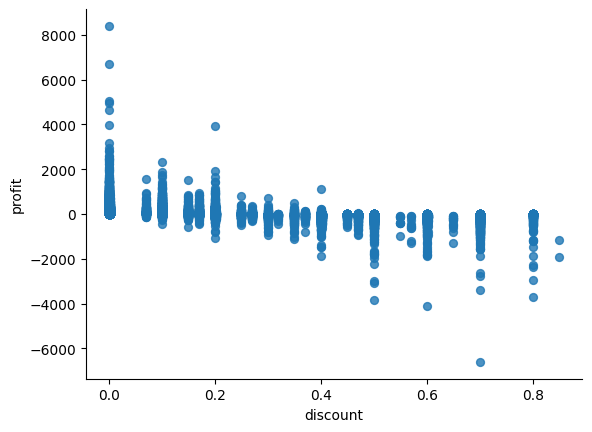

In [40]:
# @title discount vs profit

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='discount', y='profit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

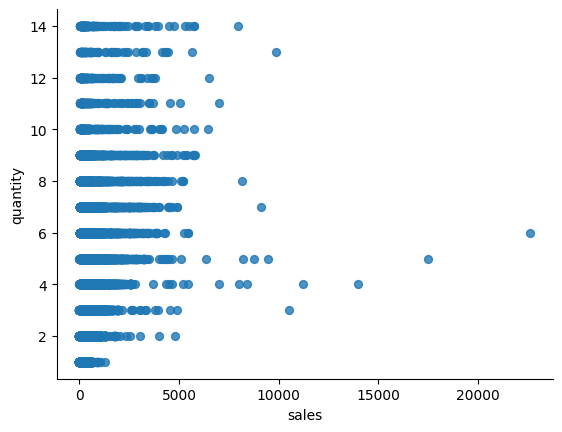

In [39]:
# @title sales vs quantity

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='sales', y='quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

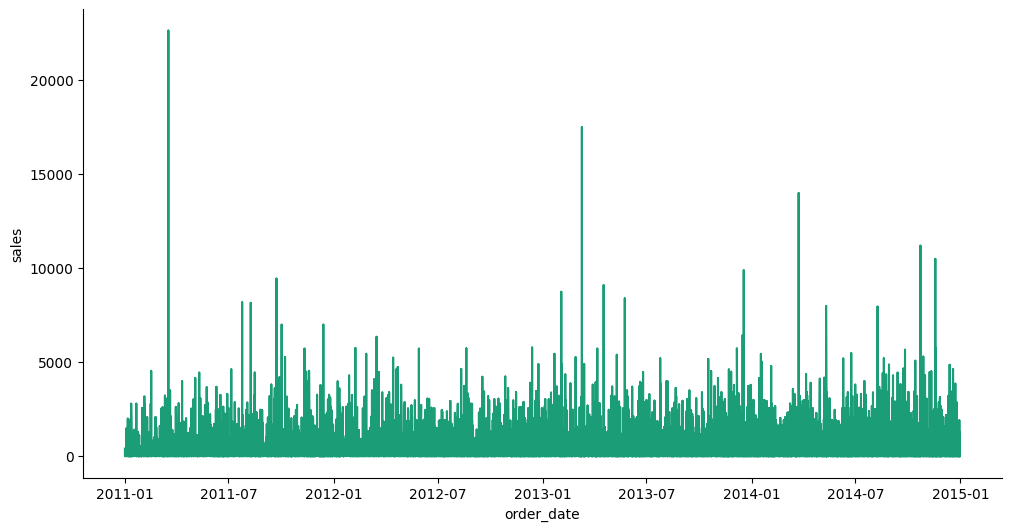

In [41]:
# @title order_date vs sales

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['order_date']
  ys = series['sales']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('order_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('order_date')
_ = plt.ylabel('sales')

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=20,8

In [43]:
profit_table=pd.pivot_table(df,index='order_date',values='profit',aggfunc=np.sum)
print(profit_table.head())

               profit
order_date           
2011-01-01   198.8730
2011-01-02   603.4736
2011-01-03  1905.1539
2011-01-04  -308.7874
2011-01-06  2460.2536


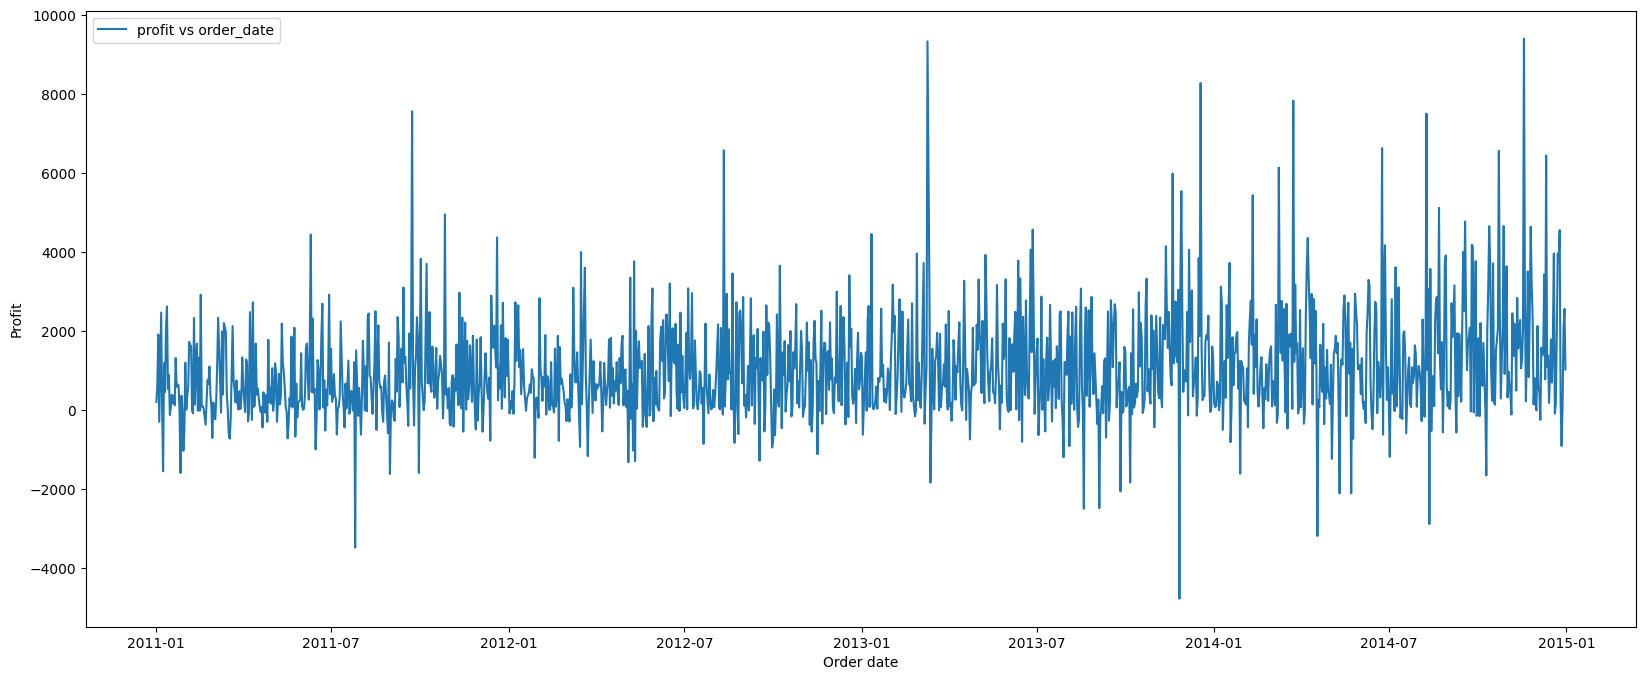

In [44]:
plt.xlabel("Order date")
plt.ylabel("Profit")
plt.plot(profit_table)
plt.legend(['profit vs order_date'])
plt.show()

In [34]:
df['order_day'] = df['order_date'].dt.day_name()
df['order_month']=df['order_date'].dt.month_name()

In [46]:
profit_table_day=pd.pivot_table(df,index='order_day',values='profit',aggfunc=np.sum)
profit_table_day

,profit
order_day,
Friday,243802.83544
Monday,246526.55710
Saturday,176486.55222
Sunday,104117.90698
Thursday,242760.60994
Tuesday,249788.05098
Wednesday,205552.30862


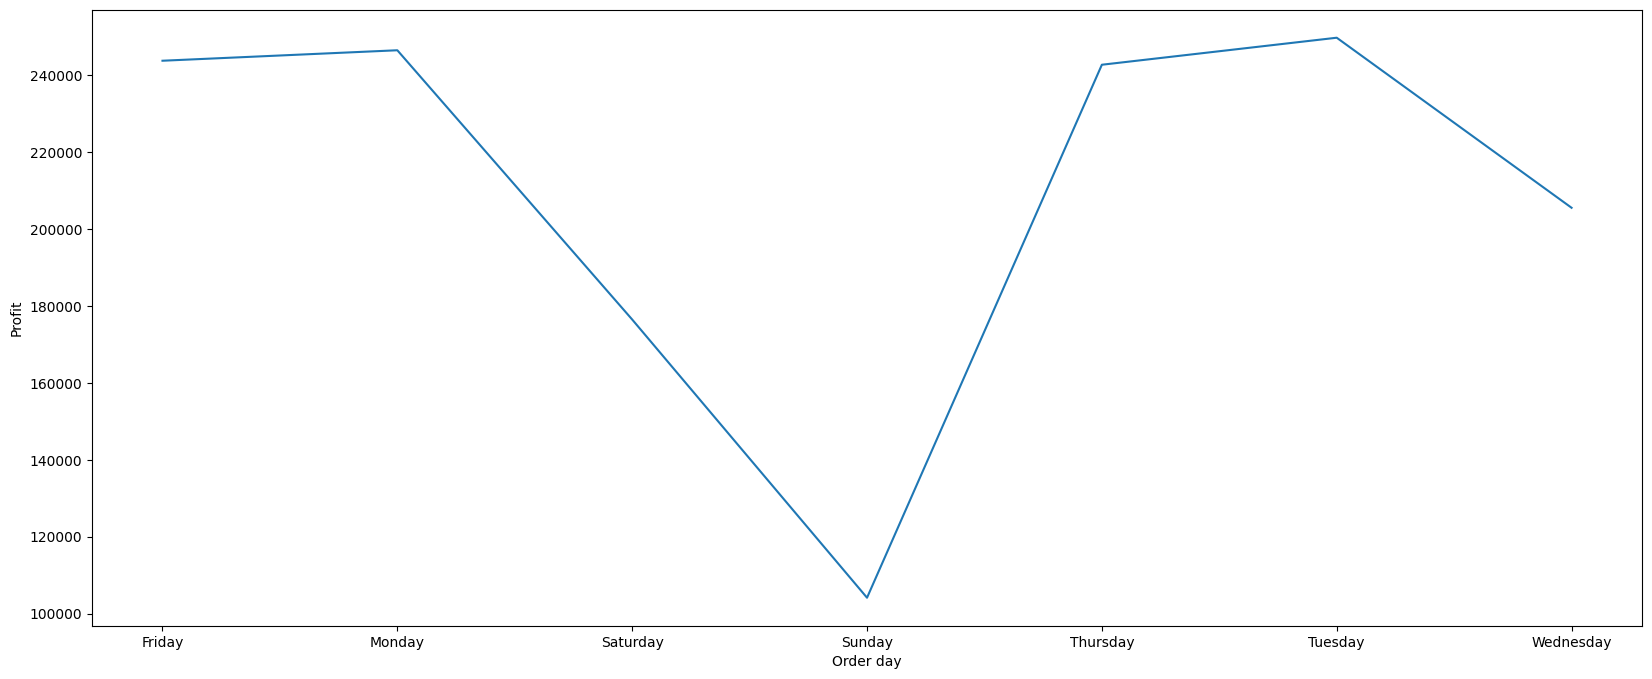

In [47]:
plt.xlabel("Order day")
plt.ylabel("Profit")
plt.plot(profit_table_day)

In [48]:
sales_table_day=pd.pivot_table(df,index='order_day',values='sales',aggfunc=np.sum)
sales_table_day

,sales
order_day,
Friday,2144899
Monday,2067111
Saturday,1433823
Sunday,834689
Thursday,2057559
Tuesday,2150148
Wednesday,1954676


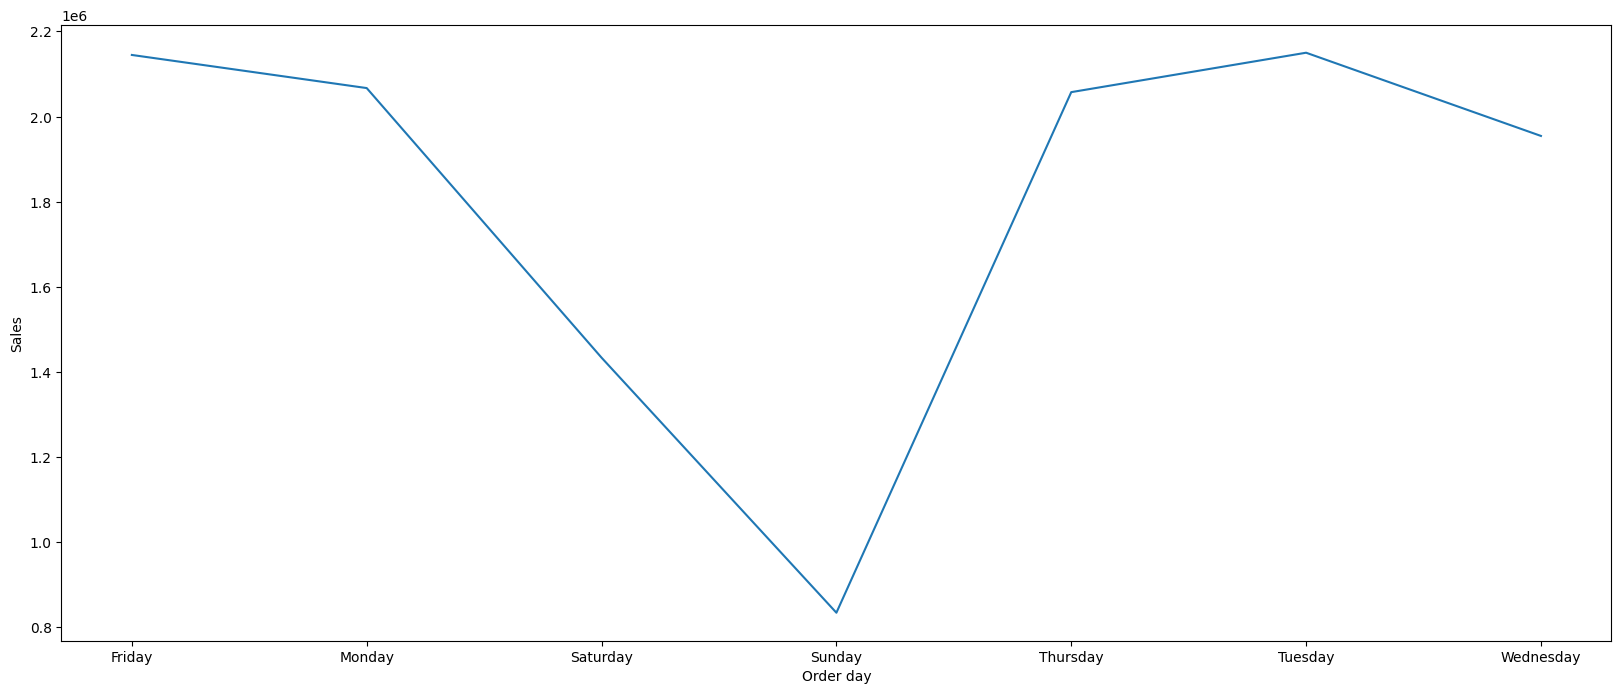

In [49]:
plt.xlabel("Order day")
plt.ylabel("Sales")
plt.plot(sales_table_day)

In [50]:
profit_table_month=pd.pivot_table(df,index='order_month',values='profit',aggfunc=np.sum)
profit_table_month

,profit
order_month,
April,95927.05920
August,135583.35630
December,161550.20268
February,96425.03602
January,90584.80272
July,85827.65364
June,144458.78866
March,123893.00142
May,112609.29714


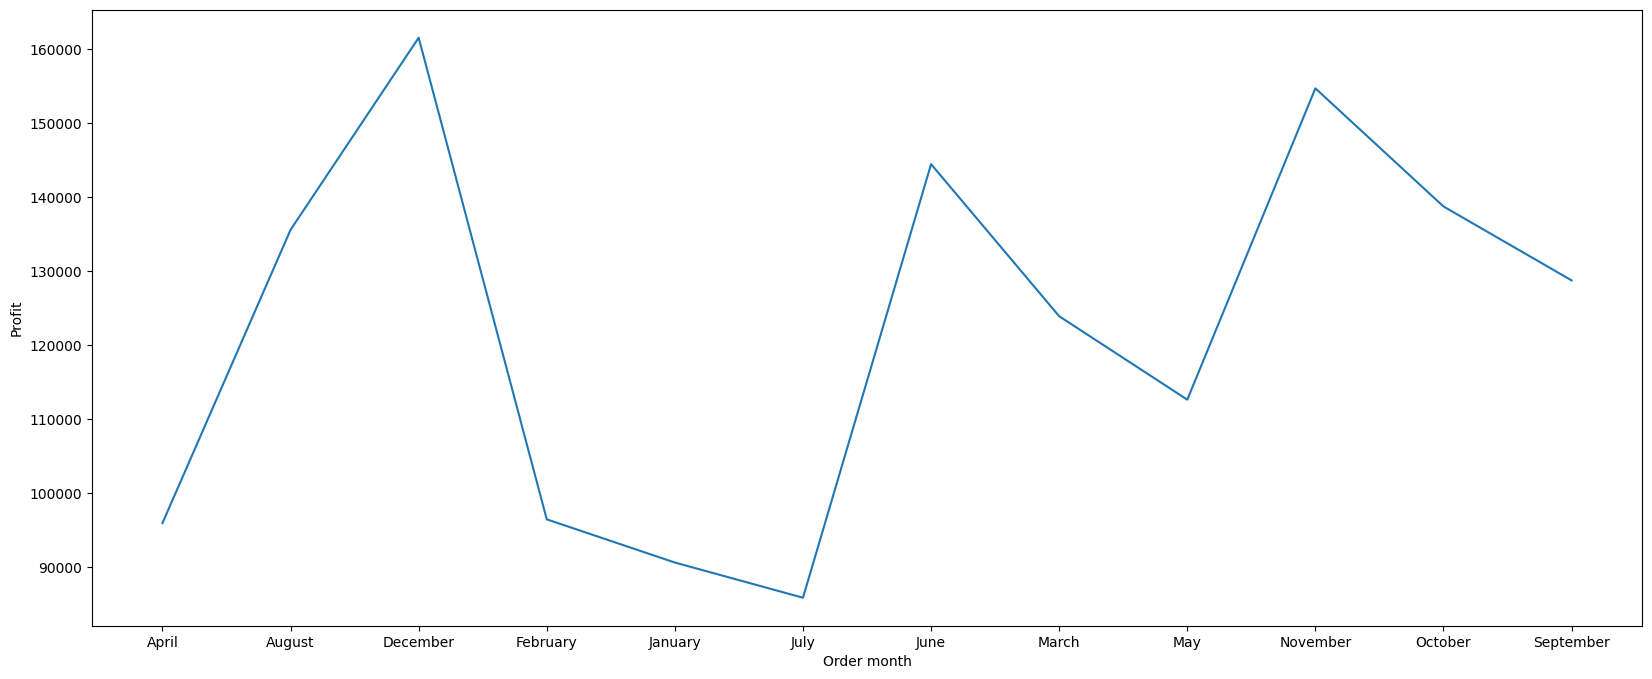

In [51]:
plt.xlabel("Order month")
plt.ylabel("Profit")
plt.plot(profit_table_month)

In [52]:
sales_table_month=pd.pivot_table(df,index='order_month',values='sales',aggfunc=np.sum)
sales_table_month

,sales
order_month,
April,851641
August,1247542
December,1383376
February,722888
January,775794
July,838761
June,1152392
March,951379
May,976429


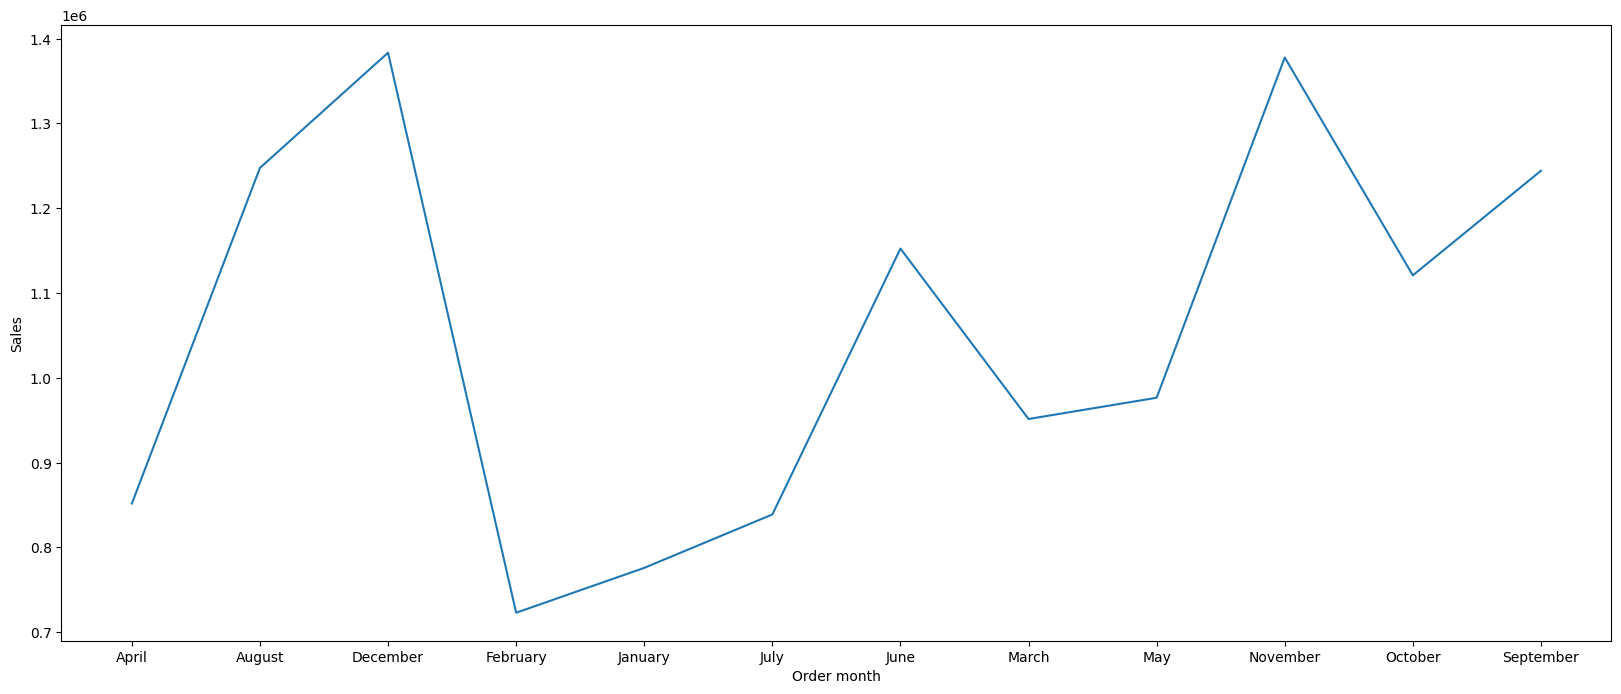

In [53]:
plt.xlabel("Order month")
plt.ylabel("Sales")
plt.plot(sales_table_month)

In [35]:
day_mapping = {'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6}
month_mapping = {'January': 0, 'February': 1, 'March': 2, 'April': 3, 'May': 4, 'June': 5,
                 'July': 6, 'August': 7, 'September': 8, 'October': 9, 'November': 10, 'December': 11}

# apply mappings to encode columns
df['order_day'] = df['order_day'].map(day_mapping)
df['order_month'] = df['order_month'].map(month_mapping)
df

,order_date,sales,quantity,discount,profit,shipping_cost,year,order_priority_ec,category_ec,sub_category_ec,ship_mode_ec,segment_ec,region_ec,market_ec,order_day,order_month
0,2011-01-01,408,2,0.0,106.1400,35.46,2011,3,1,14,3,0,0,1,6,0
1,2011-01-01,120,3,0.1,36.0360,9.72,2011,3,1,15,3,0,9,0,6,0
2,2011-01-01,66,4,0.0,29.6400,8.17,2011,1,1,14,2,0,5,3,6,0
3,2011-01-01,45,3,0.5,-26.0550,4.82,2011,1,1,12,2,2,7,4,6,0
4,2011-01-01,114,5,0.1,37.7700,4.70,2011,3,0,9,3,0,9,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2014-12-31,14,2,0.2,4.5188,0.89,2014,3,1,3,3,1,12,6,3,11
51286,2014-12-31,4,1,0.0,0.4200,0.49,2014,3,1,3,3,0,0,1,3,11
51287,2014-12-31,26,3,0.0,12.3600,0.35,2014,3,1,10,2,0,3,5,3,11
51288,2014-12-31,7,1,0.0,0.5600,0.20,2014,3,1,10,3,0,7,5,3,11


In [36]:
from sklearn.preprocessing import MinMaxScaler

# Specify columns for min-max scaling
all_columns = df.columns.tolist()
columns_to_scale = [col for col in all_columns if col != 'order_date']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler on the specified columns and transform them
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df

,order_date,sales,quantity,discount,profit,shipping_cost,year,order_priority_ec,category_ec,sub_category_ec,ship_mode_ec,segment_ec,region_ec,market_ec,order_day,order_month
0,2011-01-01,0.018023,0.076923,0.000000,0.447076,0.037983,0.0,1.000000,0.5,0.8750,1.000000,0.0,0.000000,0.166667,1.0,0.0
1,2011-01-01,0.005301,0.153846,0.117647,0.442402,0.010412,0.0,1.000000,0.5,0.9375,1.000000,0.0,0.750000,0.000000,1.0,0.0
2,2011-01-01,0.002915,0.230769,0.000000,0.441976,0.008751,0.0,0.333333,0.5,0.8750,0.666667,0.0,0.416667,0.500000,1.0,0.0
3,2011-01-01,0.001988,0.153846,0.588235,0.438263,0.005163,0.0,0.333333,0.5,0.7500,0.666667,1.0,0.583333,0.666667,1.0,0.0
4,2011-01-01,0.005036,0.307692,0.117647,0.442518,0.005034,0.0,1.000000,0.0,0.5625,1.000000,0.0,0.750000,0.000000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2014-12-31,0.000618,0.076923,0.235294,0.440301,0.000953,1.0,1.000000,0.5,0.1875,1.000000,0.5,1.000000,1.000000,0.5,1.0
51286,2014-12-31,0.000177,0.000000,0.000000,0.440028,0.000525,1.0,1.000000,0.5,0.1875,1.000000,0.0,0.000000,0.166667,0.5,1.0
51287,2014-12-31,0.001149,0.153846,0.000000,0.440824,0.000375,1.0,1.000000,0.5,0.6250,0.666667,0.0,0.250000,0.833333,0.5,1.0
51288,2014-12-31,0.000309,0.000000,0.000000,0.440037,0.000214,1.0,1.000000,0.5,0.6250,1.000000,0.0,0.583333,0.833333,0.5,1.0


In [37]:
from sklearn.model_selection import train_test_split

df_X = df.drop(['profit','order_date'], axis=1)
df_y = df['profit']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model=LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 8.585752245651528e-05


In [39]:
from sklearn.metrics import mean_absolute_error
threshold = 0.05 * (y_test.max() - y_test.min())
accurate_predictions = (abs(y_test - y_pred) <= threshold).sum()
accuracy = accurate_predictions / len(y_test)
mae = mean_absolute_error(y_test, y_pred)
normalized_mae = mae / (y_test.max() - y_test.min())
precision_like = 1 - normalized_mae
print("Precision-like metric:", precision_like)
print("Threshold-based accuracy:", accuracy)

Precision-like metric: 0.9909459295019521
Threshold-based accuracy: 0.9777734451160071


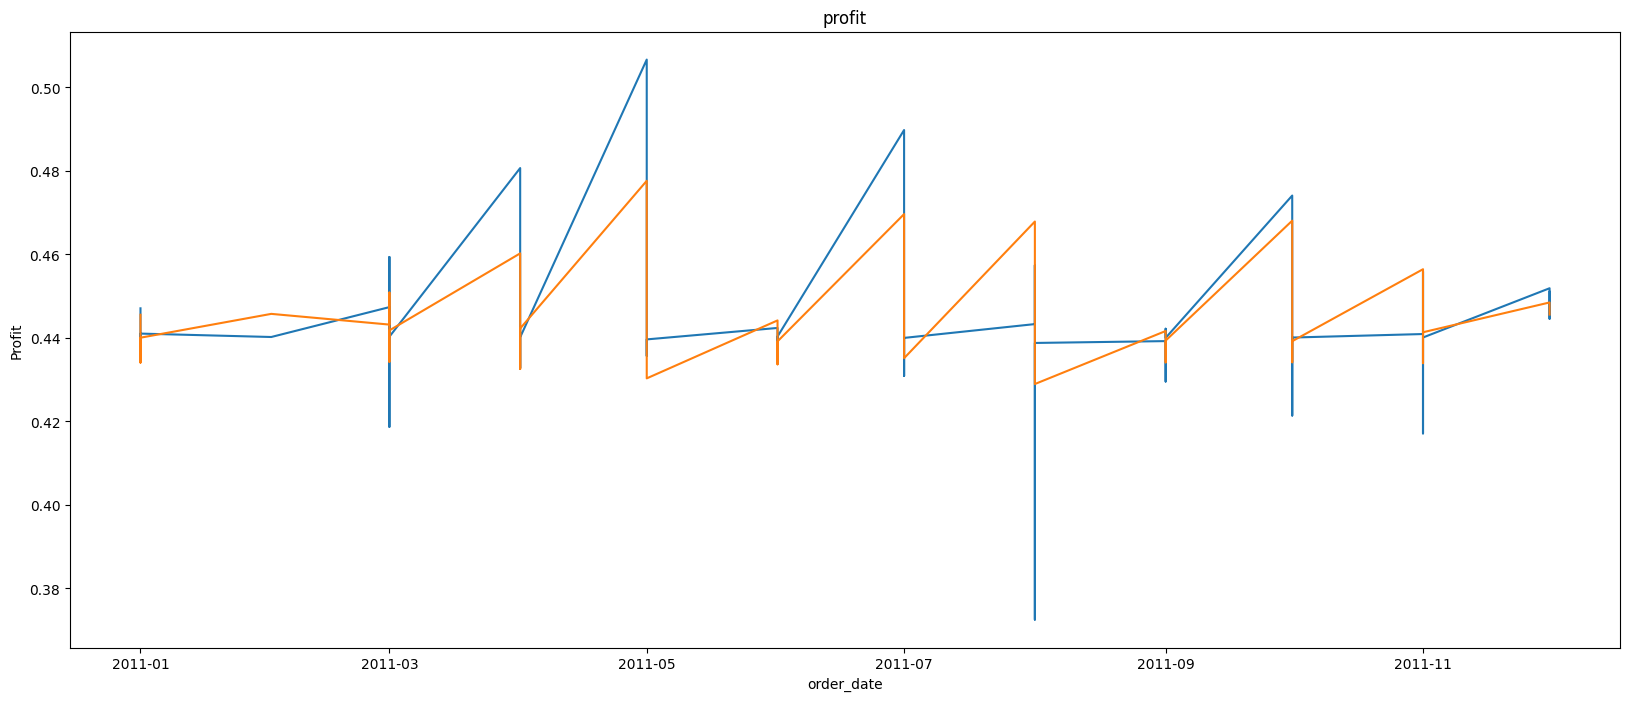

In [40]:
plt.plot(df['order_date'][0:150],df_y[0:150])
plt.xlabel('order_date')
plt.ylabel('Profit')
plt.title('profit')
plt.plot(df['order_date'][0:150],model.predict(df_X[0:150]))
plt.show()

In [41]:
predicted_normalized_profit = model.predict(df_X)

In [43]:
predicted_normalized_profit

array([0.44553806, 0.44019843, 0.44121317, ..., 0.44133602, 0.44144554,
       0.43815952])

**XG** **Boost**

In [64]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [65]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    'objective': 'reg:squarederror',  # For regression tasks
    'eval_metric': 'rmse',           # Evaluation metric (root mean squared error)
    'max_depth': 3,                  # Maximum depth of trees
    'eta': 0.1                       # Learning rate
}
num_rounds = 100  # Number of boosting rounds
model = xgb.train(params, dtrain, num_rounds)
predictions = model.predict(dtest)

# Evaluate the model
rmse = mean_squared_error(y_test, predictions, squared=False)
print("RMSE:", rmse)

RMSE: 0.00552364941858294


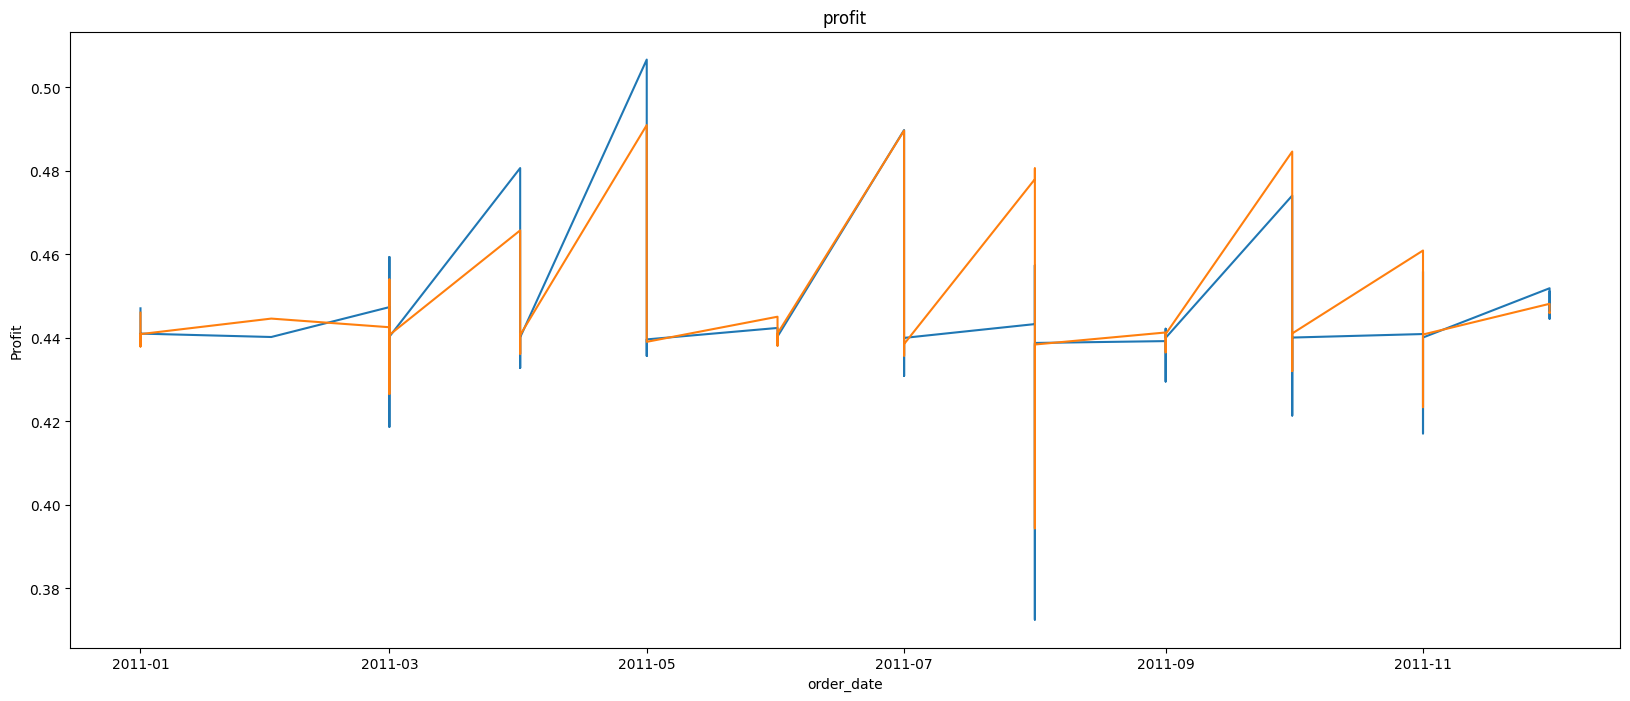

In [70]:
plt.plot(df['order_date'][0:150],df_y[0:150])
plt.xlabel('order_date')
plt.ylabel('Profit')
plt.title('profit')
dmatrix_slice = xgb.DMatrix(df_X[0:150])
plt.plot(df['order_date'][0:150],model.predict(dmatrix_slice))
plt.show()

**Random Forest Regressor**

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [75]:
clf = RandomForestRegressor(n_estimators=100, random_state=42)

In [77]:
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 0.005694034099920287


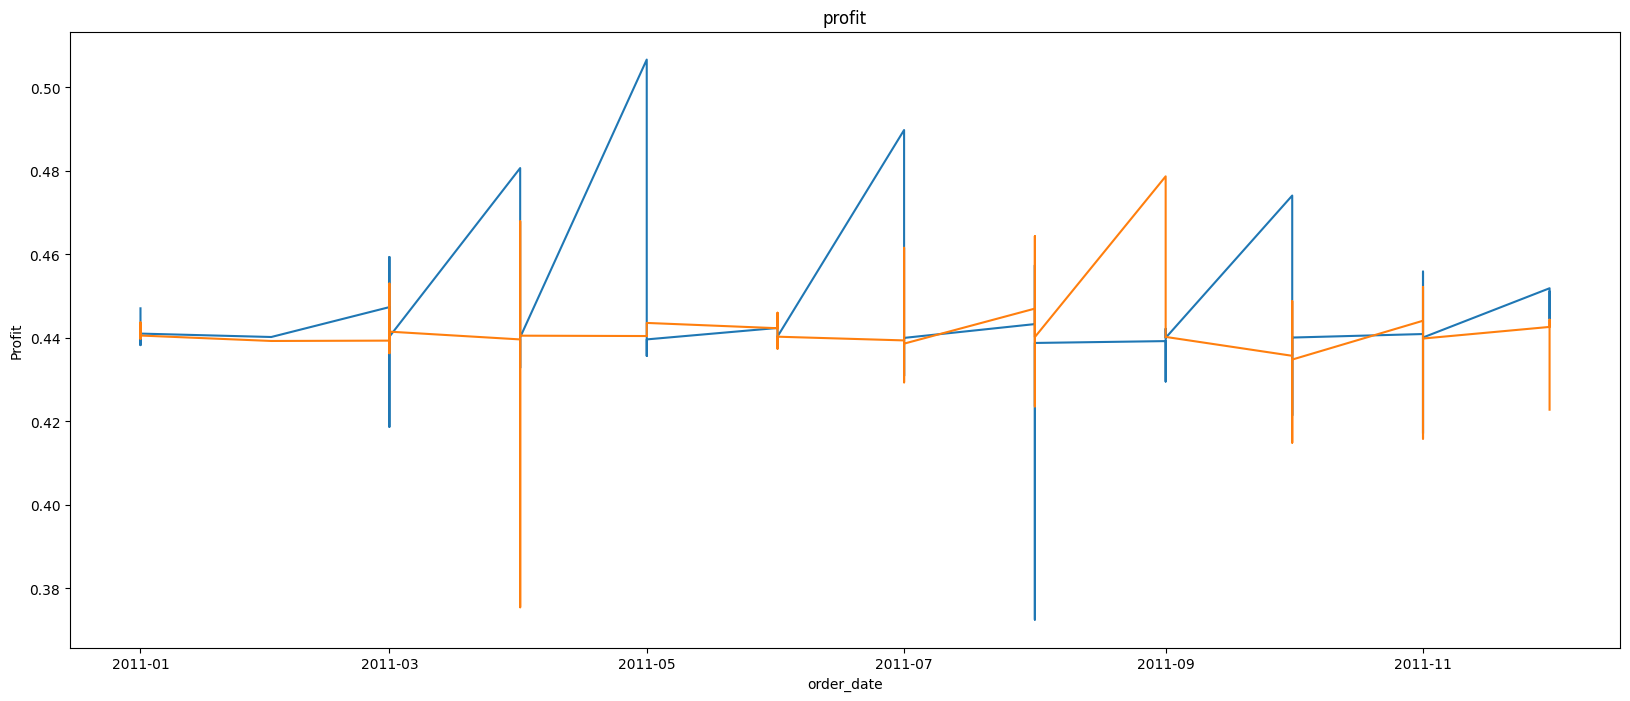

In [78]:
plt.plot(df['order_date'][0:150],df_y[0:150])
plt.xlabel('order_date')
plt.ylabel('Profit')
plt.title('profit')
plt.plot(df['order_date'][0:150],y_pred[0:150])
plt.show()

In [50]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [58]:
X = df.drop(['profit','order_date'], axis=1)
y_normalized = df['profit']
tscv = TimeSeriesSplit(n_splits=5)

mae_scores = []
rmse_scores = []
mape_scores = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_normalized.iloc[train_index], y_normalized.iloc[test_index]

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_normalized = model.predict(X_test)
    epsilon = 1e-10  # Small non-zero value
    y_test_adjusted = np.where(y_test == 0, epsilon, y_test)
    # Calculate metrics
    mae = mean_absolute_error(y_test_adjusted, y_pred_normalized)
    rmse = np.sqrt(mean_squared_error(y_test_adjusted, y_pred_normalized))
    mape = np.mean(np.abs((y_test_adjusted - y_pred_normalized) / y_test_adjusted)) * 100  # Handle potential division by zero

    mae_scores.append(mae)
    rmse_scores.append(rmse)
    mape_scores.append(mape)

# Print average scores
print("Average MAE:", np.mean(mae_scores))
print("Average RMSE:", np.mean(rmse_scores))
print("Average MAPE:", np.mean(mape_scores))

Average MAE: 0.003926252051441464
Average RMSE: 0.009590649759177719
Average MAPE: 11140593.30480962


In [83]:
def time_series_cross_validation(X, y, n_splits=5):
    rmse_scores = []
    mae_scores = []
    mape_scores = []
    split_size = len(X) // n_splits

    for i in range(n_splits):
        # Split data into train and test sets for this fold
        start = i * split_size
        end = (i + 1) * split_size
        X_train, X_test = X[:start], X[start:end]
        y_train, y_test = y[:start], y[start:end]

        # Convert data to DMatrix format
        dtrain = xgb.DMatrix(X_train, label=y_train)
        dtest = xgb.DMatrix(X_test, label=y_test)

        # Define XGBoost parameters (adjust as needed)
        params = {
            'objective': 'reg:squarederror',
            'eval_metric': 'rmse',
            'max_depth': 3,
            'eta': 0.1
        }

        # Train XGBoost model
        num_rounds = 100
        model = xgb.train(params, dtrain, num_rounds)

        # Make predictions and evaluate
        predictions = model.predict(dtest)
        rmse = mean_squared_error(y_test, predictions, squared=False)
        mae = mean_absolute_error(y_test, predictions)
        mape = mean_absolute_percentage_error(y_test, predictions)

        rmse_scores.append(rmse)
        mae_scores.append(mae)
        mape_scores.append(mape)

        print(f"Fold {i+1} - RMSE: {rmse}, MAE: {mae}, MAPE: {mape}")

    # Calculate average scores
    avg_rmse = sum(rmse_scores) / len(rmse_scores)
    avg_mae = sum(mae_scores) / len(mae_scores)
    avg_mape = sum(mape_scores) / len(mape_scores)

    return {"avg_rmse": avg_rmse, "avg_mae": avg_mae, "avg_mape": avg_mape}

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculates Mean Absolute Percentage Error (MAPE)"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    epsilon = np.finfo(np.float64).eps  # Smallest representable positive number
    y_true_nonzero = np.where(y_true == 0, epsilon, y_true)
    return np.mean(np.abs((y_true_nonzero - y_pred) / y_true_nonzero)) * 100

# Example usage (assuming df_X and df_y are your feature and target dataframes):
results = time_series_cross_validation(df_X.values, df_y.values, n_splits=5)

print("\nAverage Scores:")
print(f"RMSE: {results['avg_rmse']}")
print(f"MAE: {results['avg_mae']}")
print(f"MAPE: {results['avg_mape']}")

Fold 1 - RMSE: 0.4419478330545815, MAE: 0.44180551069294016, MAPE: 100.0
Fold 2 - RMSE: 0.006129768511594227, MAE: 0.00249841436959828, MAPE: 0.561094157642558
Fold 3 - RMSE: 0.007558547408208293, MAE: 0.0024870512765475064, MAPE: 0.5621886870868872
Fold 4 - RMSE: 0.007231176520492693, MAE: 0.0024200044557235977, MAPE: 12866035779402.041
Fold 5 - RMSE: 0.006633109317171608, MAE: 0.002507956074340434, MAPE: 0.5649907304597727

Average Scores:
RMSE: 0.09390008696240967
MAE: 0.09034378737383
MAPE: 2573207155900.7456


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(df['profit'])

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

ADF Statistic: -93.594336
p-value: 0.000000


In [ ]:
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
!pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.8 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm

model = pm.auto_arima(df['profit'], seasonal=True, stepwise=True, suppress_warnings=True)
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                51290
Model:               SARIMAX(5, 0, 3)   Log Likelihood              155973.167
Date:                Thu, 04 Jul 2024   AIC                        -311926.334
Time:                        17:51:00   BIC                        -311837.882
Sample:                             0   HQIC                       -311898.660
                              - 51290                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3640      0.122      2.991      0.003       0.126       0.602
ar.L1          0.1058      0.246      0.429      0.668      -0.377       0.589
ar.L2          0.0316      0.273      0.116      0.9

In [ ]:
data_diff = df['profit'].diff().dropna()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['profit'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -93.59433573587998
p-value: 0.0


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data_diff, order=(5,0,3))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 profit   No. Observations:                51289
Model:                 ARIMA(5, 0, 3)   Log Likelihood              154452.287
Date:                Thu, 04 Jul 2024   AIC                        -308884.575
Time:                        17:57:08   BIC                        -308796.122
Sample:                             0   HQIC                       -308856.900
                              - 51289                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.407e-06   7.94e-06     -0.555      0.579      -2e-05    1.12e-05
ar.L1         -0.8990      0.568     -1.582      0.114      -2.012       0.214
ar.L2         -0.7166      0.436     -1.643      0.1

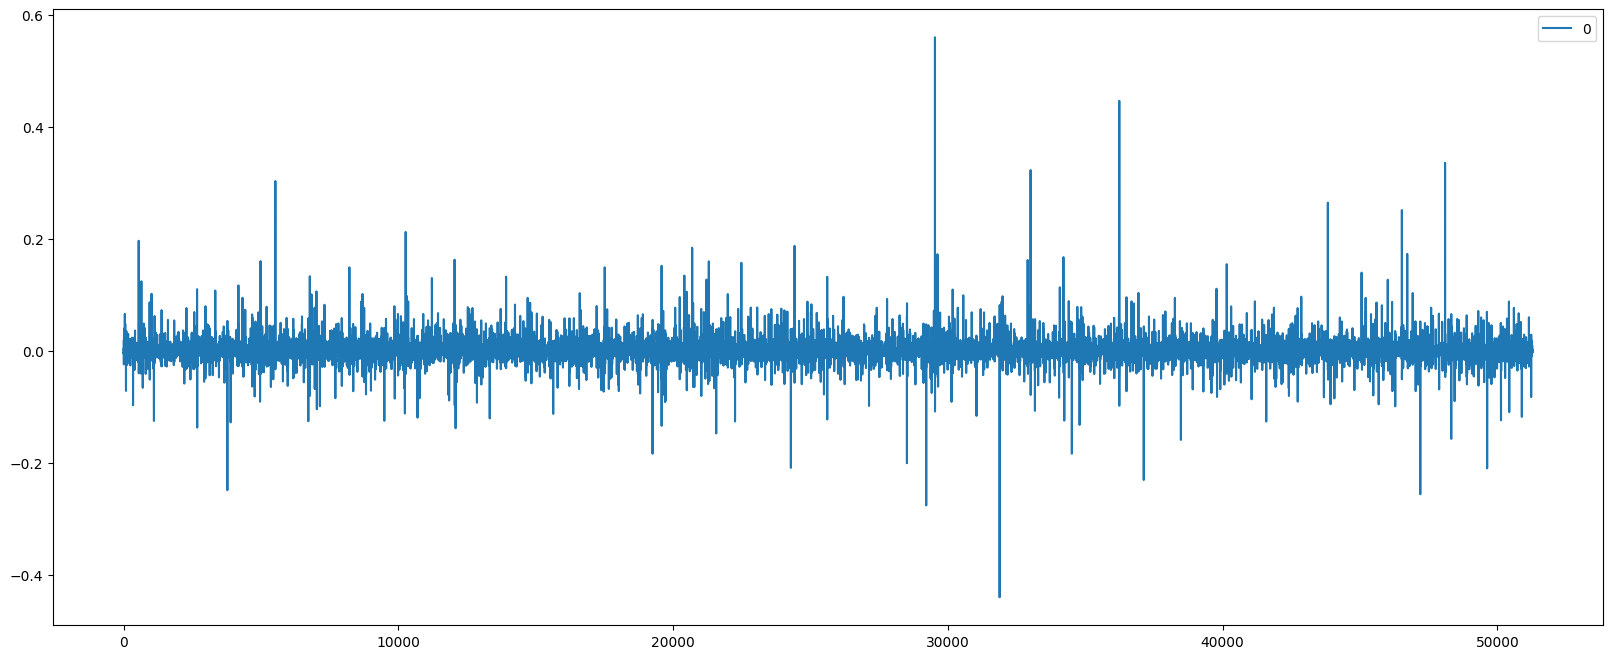

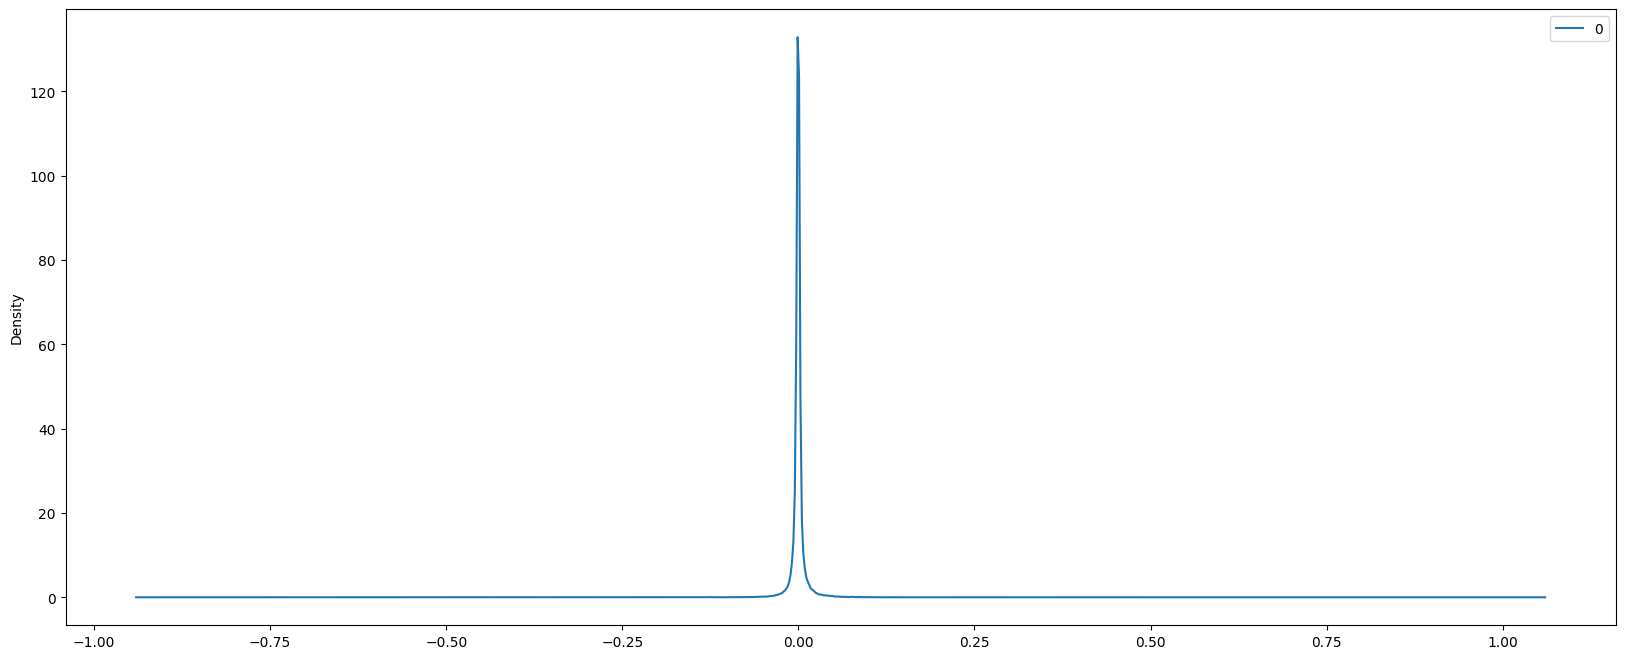

                  0
count  51289.000000
mean       0.000030
std        0.011910
min       -0.440121
25%       -0.001802
50%       -0.000219
75%        0.001081
max        0.560088


In [ ]:
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

Streaming output truncated to the last 5000 lines.
predicted=0.441605, expected=0.460595
predicted=0.441605, expected=0.441496
predicted=0.441605, expected=0.455658
predicted=0.441605, expected=0.440626
predicted=0.441605, expected=0.433883
predicted=0.441605, expected=0.446333
predicted=0.441605, expected=0.444560
predicted=0.441605, expected=0.436216
predicted=0.441605, expected=0.441263
predicted=0.441605, expected=0.441105
predicted=0.441605, expected=0.430039
predicted=0.441605, expected=0.443314
predicted=0.441605, expected=0.440616
predicted=0.441605, expected=0.444112
predicted=0.441605, expected=0.446888
predicted=0.441605, expected=0.441008
predicted=0.441605, expected=0.440917
predicted=0.441605, expected=0.441368
predicted=0.441605, expected=0.443252
predicted=0.441605, expected=0.441088
predicted=0.441605, expected=0.435497
predicted=0.441605, expected=0.439324
predicted=0.441605, expected=0.439842
predicted=0.441605, expected=0.440980
predicted=0.441605, expected=0.440334

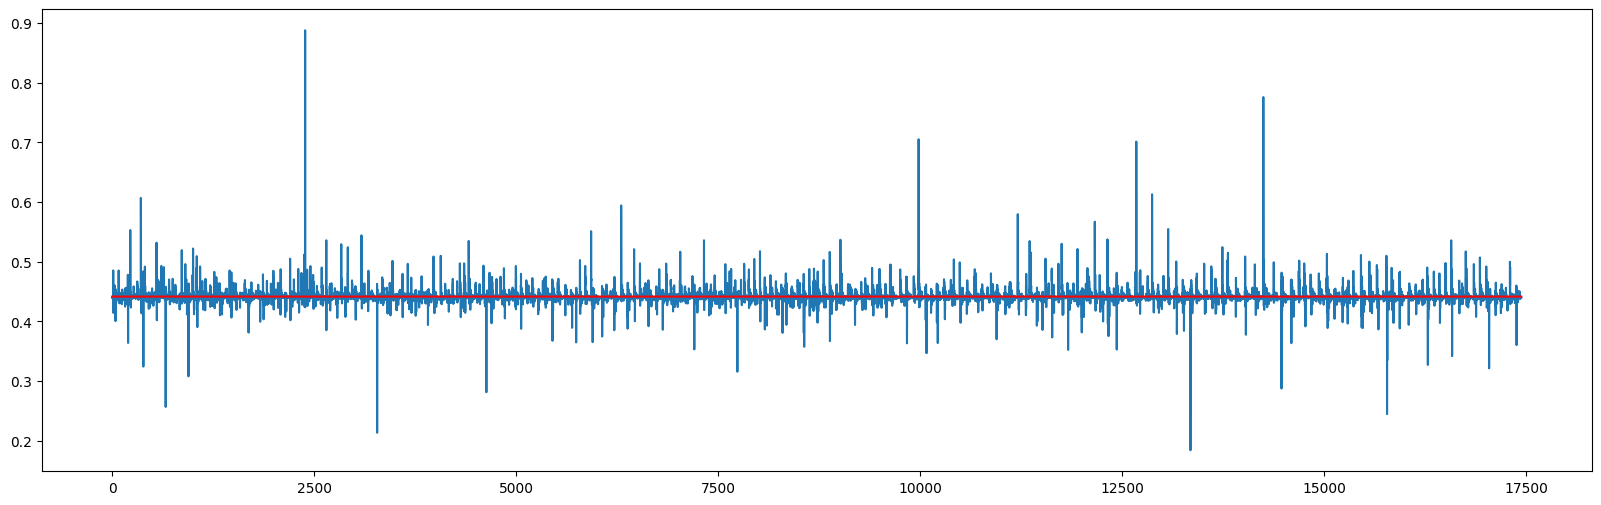

In [ ]:
from math import sqrt
X = df['profit'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 output = model_fit.forecast()
 yhat = output.iloc[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

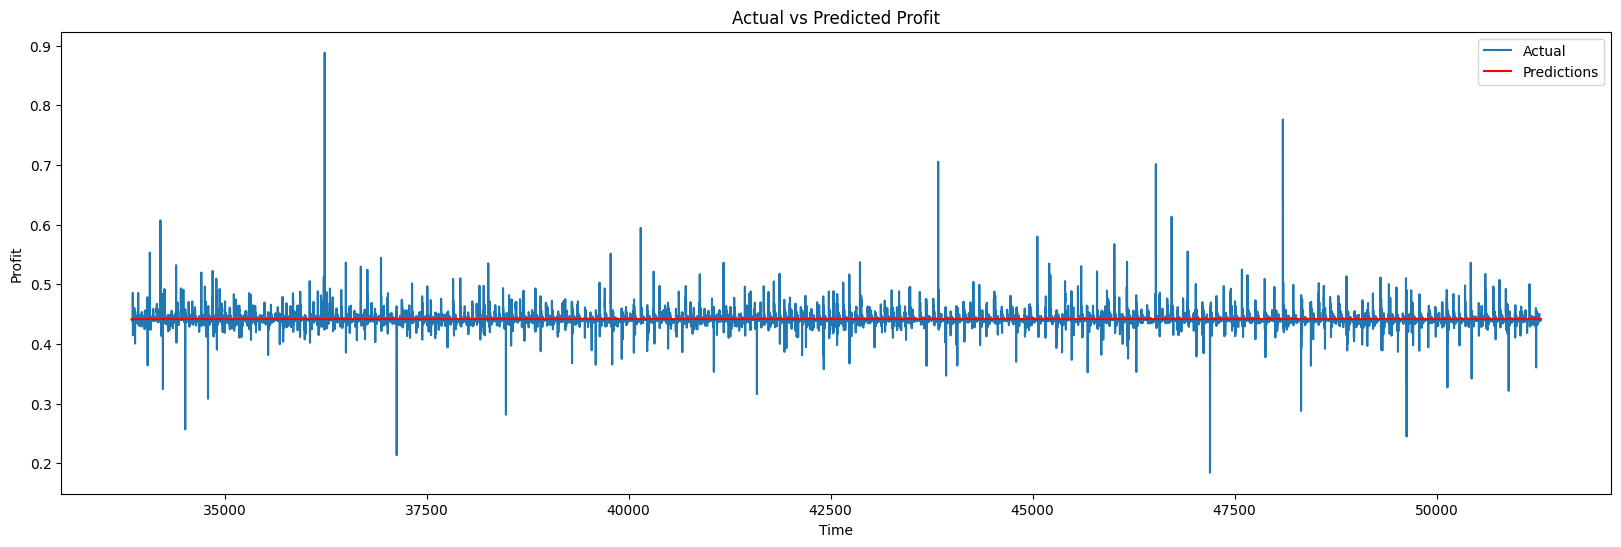

In [ ]:
test_index = range(size, len(X))

# Plot the actual values
plt.plot(test_index, test, label='Actual')

# Plot the predictions
plt.plot(test_index, predictions, color='red', label='Predictions')

plt.xlabel('Time')
plt.ylabel('Profit')
plt.title('Actual vs Predicted Profit')
plt.legend()
plt.show()

In [55]:
profit_table

,profit
order_date,
2011-01-01,198.87300
2011-01-02,603.47360
2011-01-03,1905.15390
2011-01-04,-308.78740
2011-01-06,2460.25360
...,...
2014-12-27,-916.64004
2014-12-28,81.06380
2014-12-29,2046.20678


In [56]:
from prophet import Prophet
model=Prophet()
profit_table1 = profit_table.reset_index().rename(columns={'order_date': 'ds', 'profit': 'y'})
model.fit(profit_table1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnzo7q0/9t4_rsli.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnzo7q0/a0_9cyzp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22257', 'data', 'file=/tmp/tmpjvnzo7q0/9t4_rsli.json', 'init=/tmp/tmpjvnzo7q0/a0_9cyzp.json', 'output', 'file=/tmp/tmpjvnzo7q0/prophet_modellwrml6k5/prophet_model-20240705100534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:05:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:05:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [58]:
profit_table1

,ds,y
0,2011-01-01,198.87300
1,2011-01-02,603.47360
2,2011-01-03,1905.15390
3,2011-01-04,-308.78740
4,2011-01-06,2460.25360
...,...,...
1425,2014-12-27,-916.64004
1426,2014-12-28,81.06380
1427,2014-12-29,2046.20678
1428,2014-12-30,2554.00460


In [68]:
future = model.make_future_dataframe(periods=30)
future.tail()

,ds
1455,2015-01-26
1456,2015-01-27
1457,2015-01-28
1458,2015-01-29
1459,2015-01-30


In [69]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1455,2015-01-26,1561.705550,85.865681,3075.597379
1456,2015-01-27,1592.875586,-24.641699,3260.649687
1457,2015-01-28,1398.578141,-260.507622,3123.049508
1458,2015-01-29,1592.489199,-38.707365,3205.903861
1459,2015-01-30,1617.424259,86.349394,3148.091961


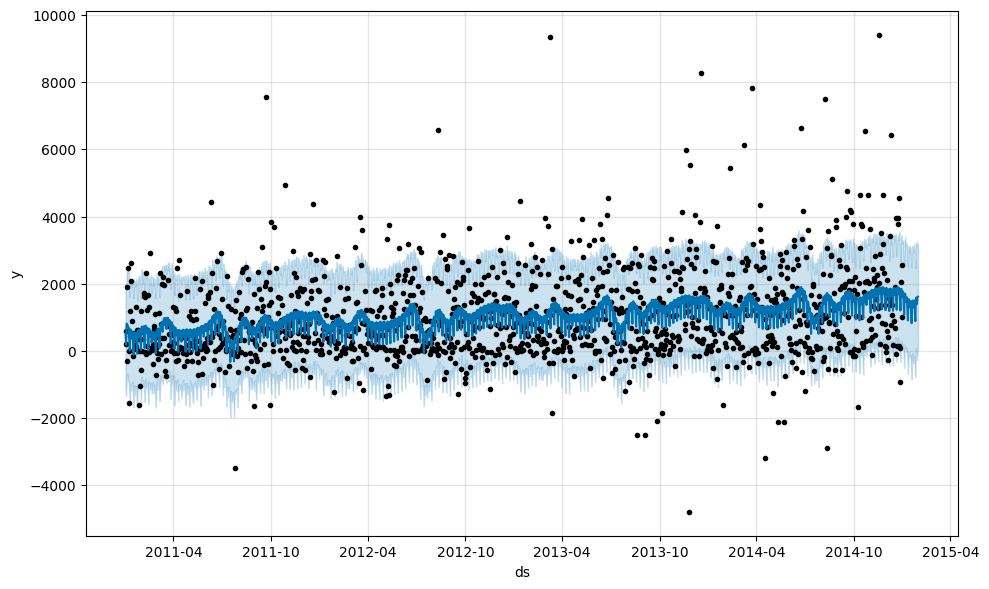

In [70]:
fig1 = model.plot(forecast)

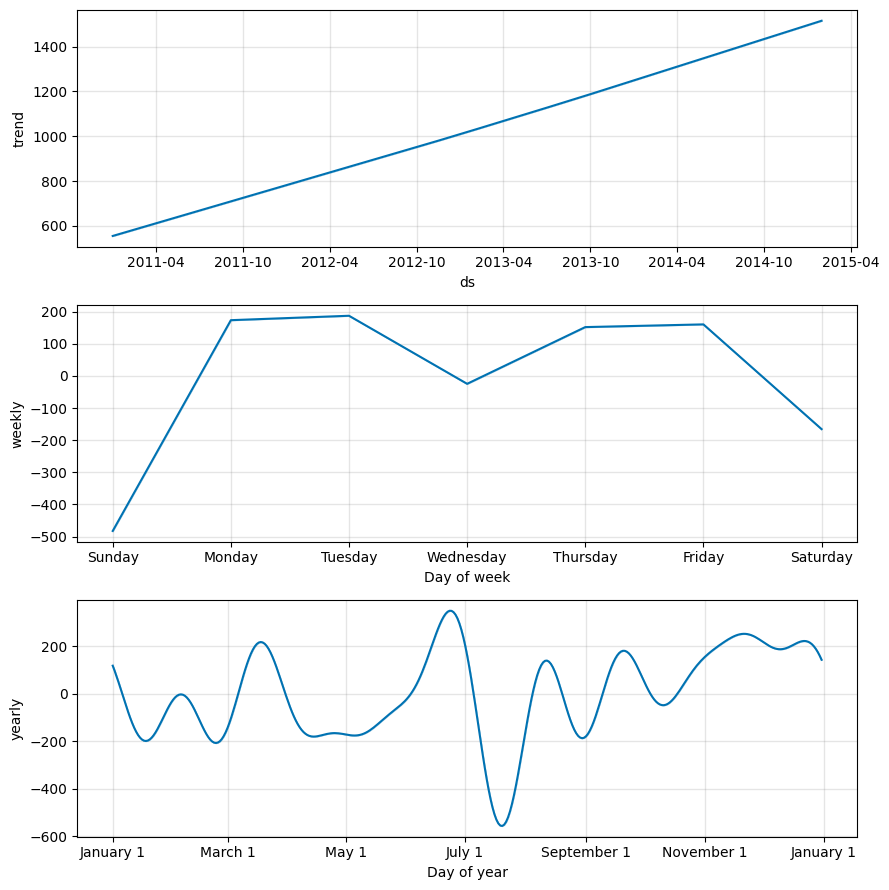

In [71]:
fig2 = model.plot_components(forecast)

In [72]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-01,554.704556,-1107.512320,2003.406499,554.704556,554.704556,-37.092472,-37.092472,-37.092472,-165.637054,-165.637054,-165.637054,128.544583,128.544583,128.544583,0.0,0.0,0.0,517.612084
1,2011-01-02,555.325312,-1333.559640,1844.105081,555.325312,555.325312,-375.332698,-375.332698,-375.332698,-482.758513,-482.758513,-482.758513,107.425816,107.425816,107.425816,0.0,0.0,0.0,179.992615
2,2011-01-03,555.946069,-853.649276,2299.566978,555.946069,555.946069,258.149624,258.149624,258.149624,173.480237,173.480237,173.480237,84.669387,84.669387,84.669387,0.0,0.0,0.0,814.095693
3,2011-01-04,556.566826,-691.155077,2419.049263,556.566826,556.566826,247.816093,247.816093,247.816093,187.236637,187.236637,187.236637,60.579456,60.579456,60.579456,0.0,0.0,0.0,804.382918
4,2011-01-06,557.808339,-896.782522,2377.622937,557.808339,557.808339,161.782917,161.782917,161.782917,151.953503,151.953503,151.953503,9.829414,9.829414,9.829414,0.0,0.0,0.0,719.591256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2015-01-26,1512.618843,85.865681,3075.597379,1512.605345,1512.634664,49.086707,49.086707,49.086707,173.480237,173.480237,173.480237,-124.393530,-124.393530,-124.393530,0.0,0.0,0.0,1561.705550
1456,2015-01-27,1513.293425,-24.641699,3260.649687,1513.277490,1513.310047,79.582161,79.582161,79.582161,187.236637,187.236637,187.236637,-107.654476,-107.654476,-107.654476,0.0,0.0,0.0,1592.875586
1457,2015-01-28,1513.968007,-260.507622,3123.049508,1513.950157,1513.985738,-115.389866,-115.389866,-115.389866,-24.663246,-24.663246,-24.663246,-90.726620,-90.726620,-90.726620,0.0,0.0,0.0,1398.578141
1458,2015-01-29,1514.642590,-38.707365,3205.903861,1514.623084,1514.662226,77.846610,77.846610,77.846610,151.953503,151.953503,151.953503,-74.106893,-74.106893,-74.106893,0.0,0.0,0.0,1592.489199


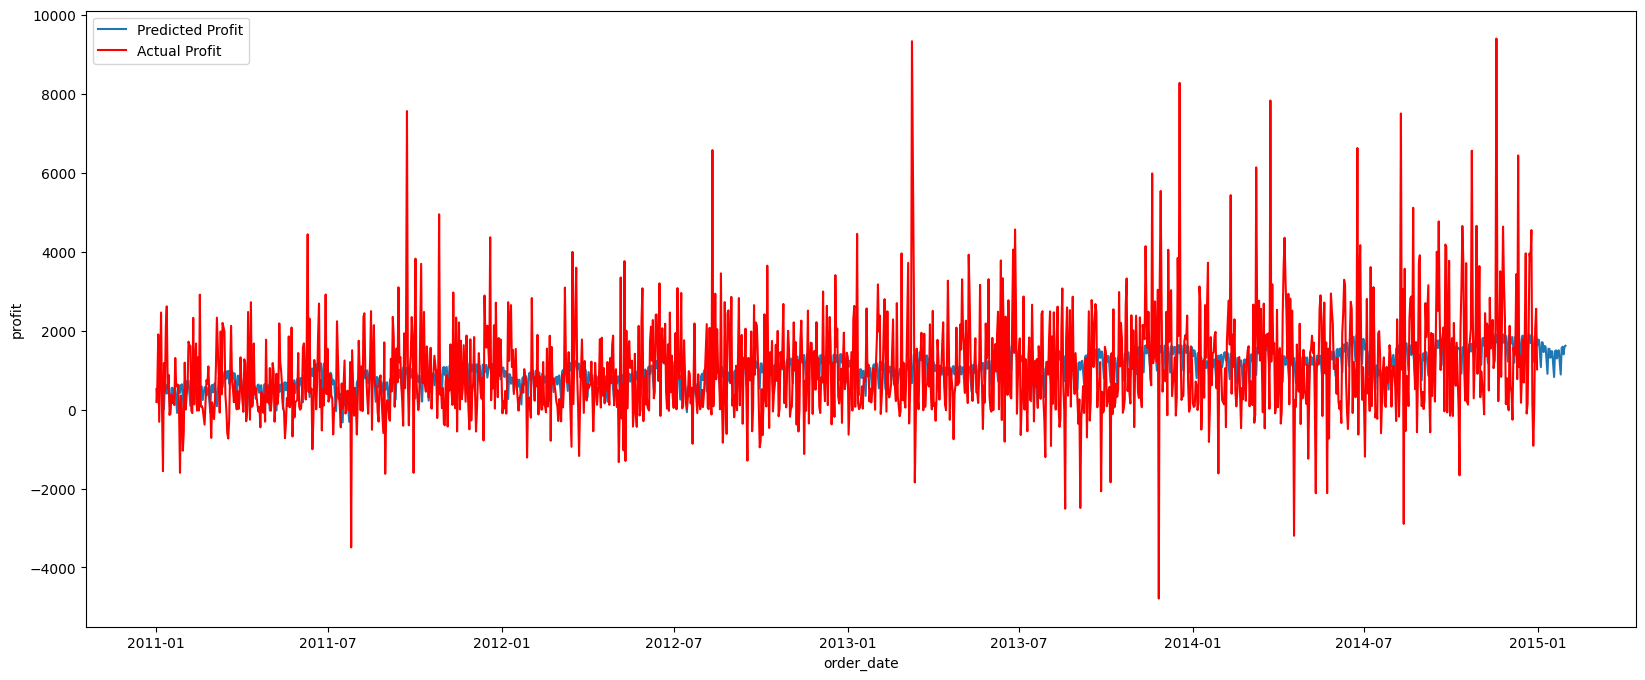

In [73]:
plt.xlabel('order_date')
plt.ylabel('profit')

# Plot the forecasted values
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Profit')

# Plot the actual profit values
plt.plot(profit_table, color='red', label='Actual Profit')

plt.legend()
plt.show()

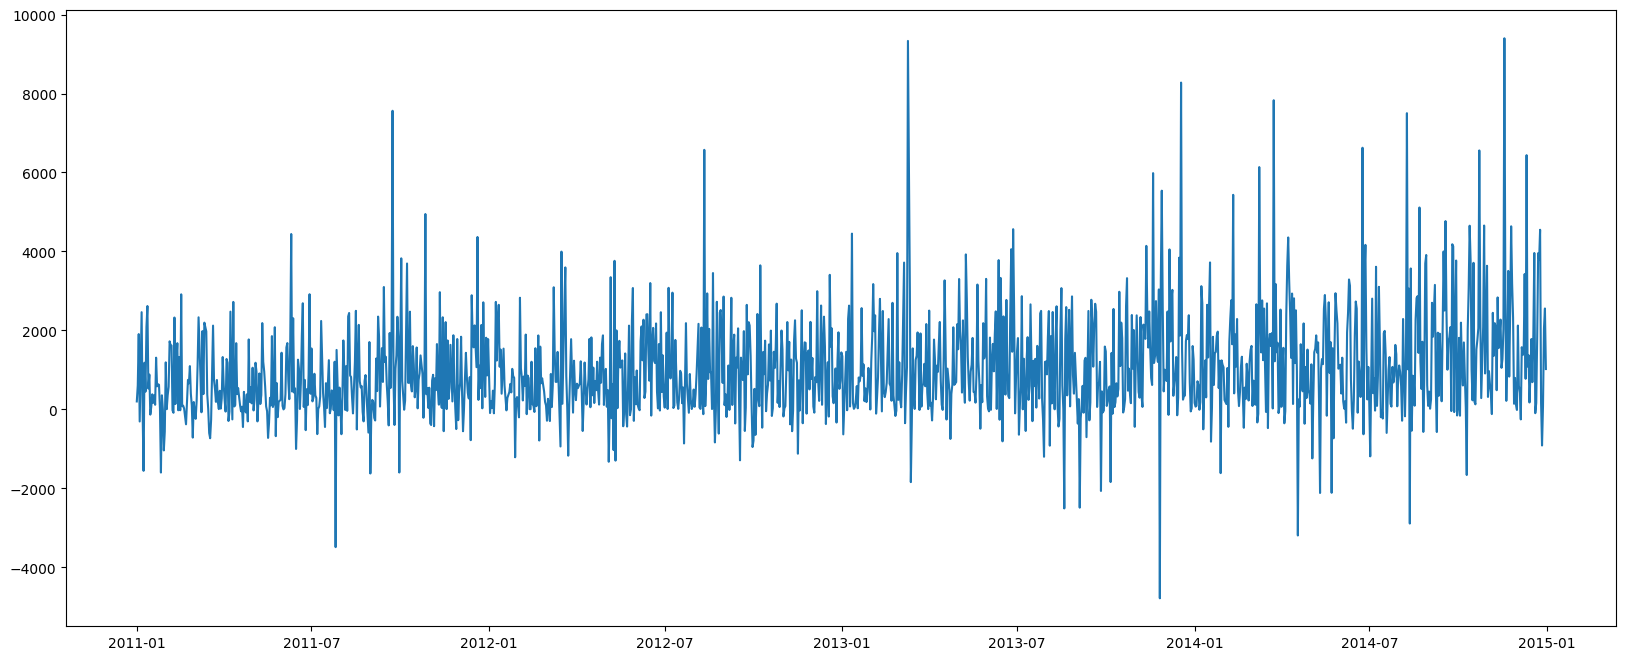

In [65]:
plt.plot(profit_table)

In [74]:
df['profit']

0        106.1400
1         36.0360
2         29.6400
3        -26.0550
4         37.7700
           ...   
51285      4.5188
51286      0.4200
51287     12.3600
51288      0.5600
51289     -0.6048
Name: profit, Length: 51290, dtype: float64

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [78]:
tf.random.set_seed(7)

In [79]:
profit_table1

,ds,y
0,2011-01-01,198.87300
1,2011-01-02,603.47360
2,2011-01-03,1905.15390
3,2011-01-04,-308.78740
4,2011-01-06,2460.25360
...,...,...
1425,2014-12-27,-916.64004
1426,2014-12-28,81.06380
1427,2014-12-29,2046.20678
1428,2014-12-30,2554.00460


In [82]:
dataset=profit_table.values
dataset = dataset.astype('float32')

In [83]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [84]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

958 472


In [86]:
def create_dataset(dataset, look_back=1):
 dataX, dataY = [], []
 for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
 return np.array(dataX), np.array(dataY)

In [87]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [88]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [89]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
956/956 - 4s - loss: 0.0242 - 4s/epoch - 5ms/step
Epoch 2/100
956/956 - 3s - loss: 0.0064 - 3s/epoch - 3ms/step
Epoch 3/100
956/956 - 2s - loss: 0.0064 - 2s/epoch - 2ms/step
Epoch 4/100
956/956 - 2s - loss: 0.0064 - 2s/epoch - 2ms/step
Epoch 5/100
956/956 - 2s - loss: 0.0063 - 2s/epoch - 2ms/step
Epoch 6/100
956/956 - 2s - loss: 0.0064 - 2s/epoch - 2ms/step
Epoch 7/100
956/956 - 2s - loss: 0.0063 - 2s/epoch - 2ms/step
Epoch 8/100
956/956 - 3s - loss: 0.0063 - 3s/epoch - 3ms/step
Epoch 9/100
956/956 - 2s - loss: 0.0063 - 2s/epoch - 2ms/step
Epoch 10/100
956/956 - 2s - loss: 0.0063 - 2s/epoch - 2ms/step
Epoch 11/100
956/956 - 2s - loss: 0.0063 - 2s/epoch - 2ms/step
Epoch 12/100
956/956 - 2s - loss: 0.0064 - 2s/epoch - 2ms/step
Epoch 13/100
956/956 - 2s - loss: 0.0063 - 2s/epoch - 2ms/step
Epoch 14/100
956/956 - 2s - loss: 0.0064 - 2s/epoch - 2ms/step
Epoch 15/100
956/956 - 3s - loss: 0.0063 - 3s/epoch - 3ms/step
Epoch 16/100
956/956 - 2s - loss: 0.0063 - 2s/epoch - 2ms/step
E

In [90]:

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

15/15 [==============================] - 0s 2ms/step
Train Score: 1119.99 RMSE
Test Score: 1659.91 RMSE


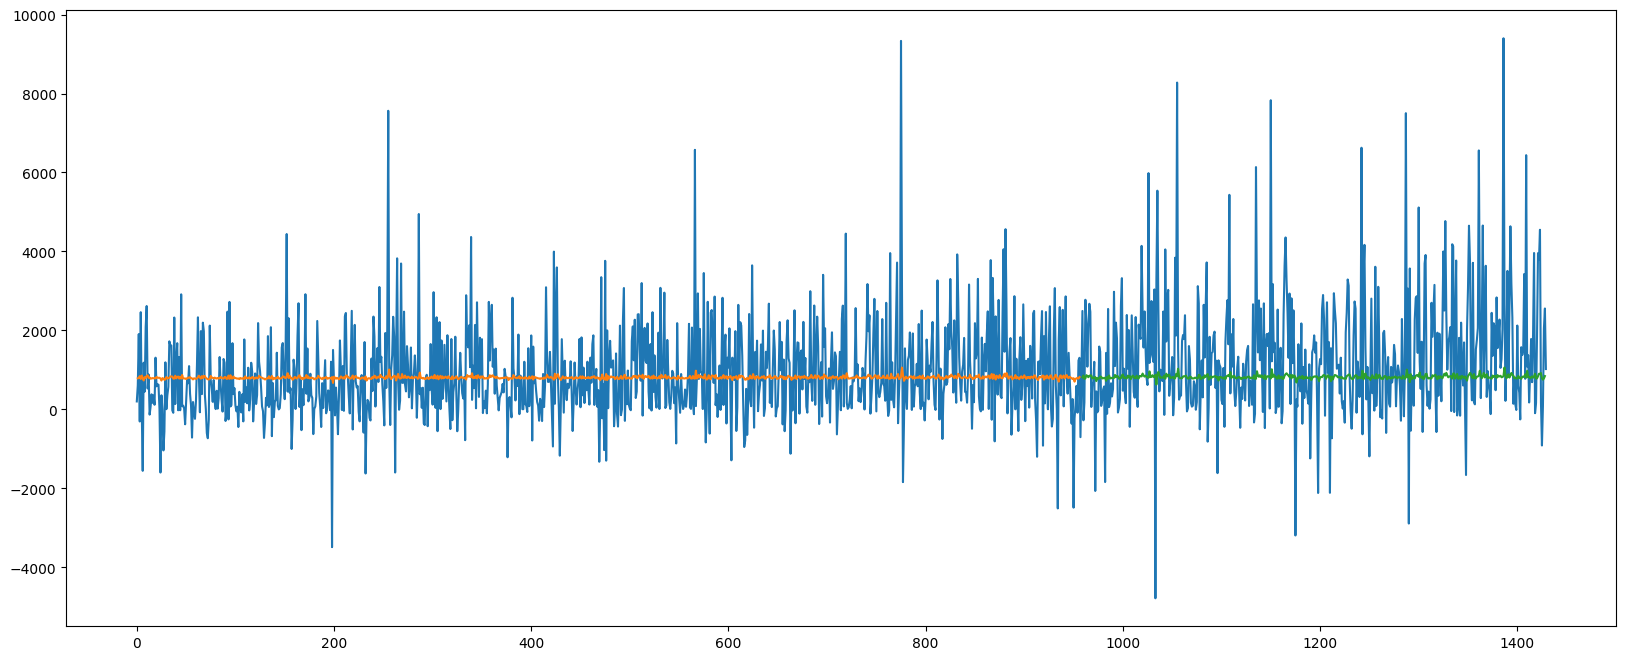

In [91]:

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()